In [1]:
# if you run this local

import os
if os.getcwd()[-10:] != "happywhale":
    os.chdir("..")

In [ ]:
# if you run this online (i.e. Colab)

!git clone https://github.com/louiskhub/happywhale.git
%cd happywhale

In [2]:
#@title Imports, Downloading + cleaning data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorboard as tb
from scipy.interpolate import interp1d

experiment_id = "62C2yxkyTeO9TlQIzoacwg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

df = df[df["tag"].apply(lambda x : "iter" not  in x)]

def concat_data(df, data_order):
  earlier,later = data_order
  late_indexes = df[df["run"].apply(lambda x: later in x)].index
  earlier_indexes = df[df["run"].apply(lambda x: earlier in x)].index

  max_epoch = df.loc[earlier_indexes,"step"].max() + 1

  df.loc[late_indexes,"step"] += max_epoch
  df.loc[earlier_indexes,"run"]= df.loc[earlier_indexes,"run"].apply(lambda x : x.replace(earlier,later))
  return df

df.loc[df["run"].apply(lambda x: "train" in x),"kind_of_training"]="train"
df.loc[df["run"].apply(lambda x: "val" in x),"kind_of_training"]="val"


first_run_speices_weights = ("121448/", "epoch-35")
df = concat_data(df, first_run_speices_weights)
second_run_speices_weights  = ("epoch-35","after epoch 39")
df = concat_data(df, second_run_speices_weights)

df["run"] = df["run"].apply(lambda run:run[:run.find("/")])

train_losses = {}


for model in df["run"].unique():
    train_loss = df[(df["run"]==model) * (df["kind_of_training"]=="train") * (df["tag"]=="epoch_loss")].sort_values("step")["value"].values    
    train_losses[model]= list(train_loss)

def cut_list(acc,cut_off_vals):
  if len(acc)>=cut_off_vals:
    return acc[:cut_off_vals]
  else:
    return acc + [None for i in range(len(acc),cut_off_vals)]

def smooth(y,cut_off_vals):
  y = y[:cut_off_vals]
  x = np.array(range(1,len(y)+1))
  cubic_interploation_model = interp1d(x, y, kind = "cubic")
  x = np.linspace(x.min(), x.max(), 10*len(x))
  y =cubic_interploation_model(x)
  return x,y

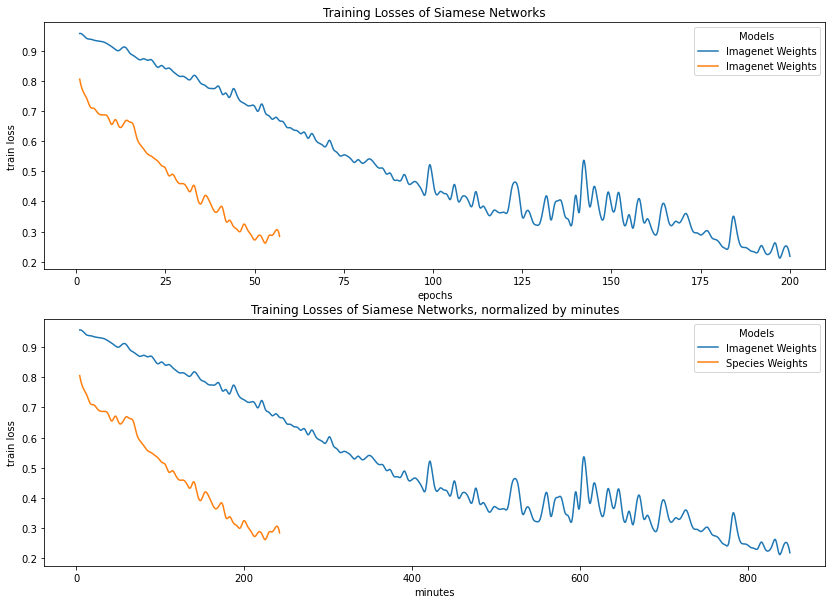

In [4]:
#@title Training Losses of Siamese Networks
fig, ax = plt.subplots(2,figsize=(14, 10))
cut_off_vals = 200
for model in df["run"].unique():
  if "contr" in model:
    label = "Control Model"
  elif "image" in model:
    label = 'Imagenet Weights'
  else: 
    'Species Weights'
  x,y = smooth(train_losses[model],cut_off_vals)

  ax[0].plot(x,y,label = label)

ax[0].legend(title="Models")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("train loss")
ax[0].set_title("Training Losses of Siamese Networks")
ax[0].plot()

inception_time = (60+25)/20
resnetv2_time = (60+55)/20


for model in df["run"].unique():

  x,y = smooth(train_losses[model],cut_off_vals)
  if "contr" in model:
    label = "Control Model"
    x*=resnetv2_time 
  elif "image" in model:
    label = 'Imagenet Weights'
    x*=inception_time
  else: 
    label = 'Species Weights'
    x*=inception_time
  ax[1].plot(x,y,label = label)

ax[1].legend(title="Models")
ax[1].set_xlabel("minutes")
ax[1].set_ylabel("train loss")
ax[1].set_title("Training Losses of Siamese Networks, normalized by minutes")
ax[1].plot()
plt.show()

![picture](https://drive.google.com/uc?id=1cSxnzbJBH-VT43PlTitOlHOKnHpXG0q1)
![picture](https://drive.google.com/uc?id=1EOMLnO9eQ0QbPZXT9BXAtCqHSNzlDlJi)
![picture](https://drive.google.com/uc?id=1ikNH2sw6-uOq2N-GKDKFLMghggH0Zzt8)
![picture](https://drive.google.com/uc?id=1vmOL_d2flcx_r4im8YBq8Qpf6NdnLytn)

![picture](https://drive.google.com/uc?id=1YqUOQrZvDx51x5rnFpldQrfrOk24xew8)
![picture](https://drive.google.com/uc?id=1aimC3W4jq6kuw8wCZvqak3vzZ0nSZRsK)

![picture](https://drive.google.com/uc?id=1dvaPleFdkNU3Adp1S32eLwn87W8Ph6kf)
![picture](https://drive.google.com/uc?id=1osGC_-EJXfXxOuH41p6Kjdv-KpyhdDN3)
![picture](https://drive.google.com/uc?id=1lvHLLSyaBkNRWVb0-RM26WSP2dx9Orqr)
![picture](https://drive.google.com/uc?id=1yDrhJkukifmV6rMq7AGNHkV0h91xj4yj)

![picture](https://drive.google.com/uc?id=1RC2UVr7OJUdUo2C_TmZx1vWmxFV6tiEB)
![picture](https://drive.google.com/uc?id=1lG5waMIho8UiUW-X_0BVm7E0wg4vsua6)